In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
hotel = pd.read_csv("drive/MyDrive/hotel_bookings.csv")

In [4]:
hotel.shape

(119390, 32)

In [5]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [6]:
hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
def data_clean(df):
  df.fillna(0,inplace=True)
  print(df.isnull().sum())

In [8]:
data_clean(hotel)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [9]:
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
def unique(df,fet):
  for i in fet:
    print(f"{i}--->:",df[i].unique())


In [11]:
unique(hotel,["adults","children","babies"])

adults--->: [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
children--->: [ 0.  1.  2. 10.  3.]
babies--->: [ 0  1  2 10  9]


In [12]:
pd.set_option("display.max_columns",35)

In [13]:
condition = (hotel["children"] == 0) & (hotel["adults"] == 0) & (hotel["babies"] == 0)
hotel[condition]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [14]:
hotel = hotel[~condition] #removed records


In [15]:
hotel.shape

(119210, 32)

#**exploratory data analysis**
problem statement
####1.where do guests come from?
####2.how much they pay for a night?

In [16]:
country = hotel[hotel["is_canceled"] == 0]["country"].value_counts().reset_index()

In [17]:
country.columns = ["country","count_of_guest"]

In [18]:
country

,country,count_of_guest
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,KIR,1
162,MDG,1
163,LCA,1
164,ZMB,1


In [19]:
import folium 
import plotly.express as ps
# visualizing data
from folium.plugins import HeatMap

In [20]:
base_map = folium.Map()

In [21]:
guest_map =   ps.choropleth(country, 
              locations = country["country"],
              color = country["count_of_guest"],
              hover_name = country["country"],
              title="Native countries of Guests",width = 800 )

In [22]:
guest_map

In [23]:
data2 = hotel[hotel["is_canceled"] == 0]

In [24]:
data2.shape

(75011, 32)

how much they pay for a night?

In [25]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

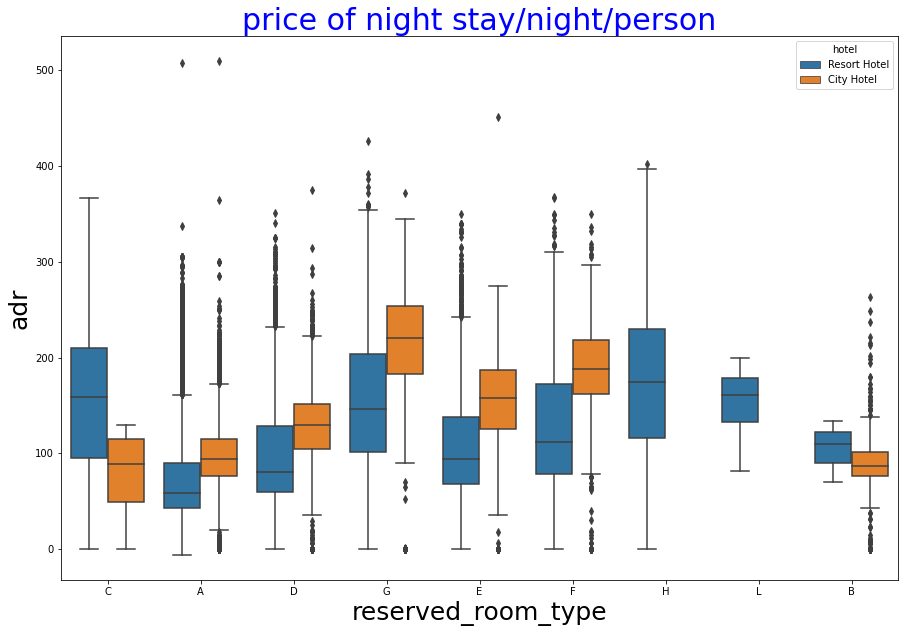

In [26]:
plt.figure(figsize=(15,10))
plt.title("price of night stay/night/person",size=30,color="blue")
plt.xlabel("reserved_room_type",size=25)
plt.ylabel("price(Euro)",size=25)
sns.boxplot(x = "reserved_room_type",y = "adr",hue = "hotel", data = data2)

**Analyzing hotel price/night across years**

In [27]:
resort_hotel = data2[data2["hotel"] == "Resort Hotel"]
city_hotel = data2[data2["hotel"] == "City Hotel"]

In [28]:
resort_hotel.shape

(28927, 32)

In [29]:
city_hotel.shape

(46084, 32)

In [30]:
# group data based on date
avg_resort_price_month = resort_hotel.groupby(["arrival_date_month"])["adr"].mean().reset_index()

In [31]:
avg_city_price_month = city_hotel.groupby(["arrival_date_month"])["adr"].mean().reset_index()

In [32]:
res_city_avgdata = pd.merge(avg_city_price_month,avg_resort_price_month,on="arrival_date_month")

In [33]:
res_city_avgdata.columns = ["Month","Avg_price_city","Avg_price_resort"]
res_city_avgdata

,Month,Avg_price_city,Avg_price_resort
0,April,111.962267,75.867816
1,August,118.674598,181.205892
2,December,88.401855,68.410104
3,February,86.520062,54.147478
4,January,82.330983,48.761125
5,July,115.818019,150.122528
6,June,117.874360,107.974850
7,March,90.658533,57.056838
8,May,120.669827,76.657558
9,November,86.946592,48.706289


In [34]:
!pip install sort-dataframeby-monthorweek
!pip install sorted-months-weekdays

  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3442 sha256=0f54578d5dd4d83531986d45fafaaec17e38cb791d11d5001851c24aadaaf127
  Stored in directory: /root/.cache/pip/wheels/de/e1/ad/5fe265a9780676079c4b8caaaffaa8d5c4ab2f37cf823e8aa8
Successfully built sort-dataframeby-monthorweek
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3247 sha256=d59a69c5a9ec88c9b87644c0ef72bd06d537eda3a007211c8003ae65f9070a9e
  Stored in directory: /root/.cache/pip/wheels/4f/4f/78/3f1b8fc72651f7c766a6f73d667fccb12a8aabe240b38df7a4
Successfully built sorted-months-weekdays


In [35]:
import sort_dataframeby_monthorweek as rd

In [36]:
def sort_data(df,col):
  return rd.Sort_Dataframeby_Month(df,col)

In [37]:
res_city_final_data = sort_data(res_city_avgdata,"Month")

In [38]:
res_city_final_data

,Month,Avg_price_city,Avg_price_resort
0,January,82.330983,48.761125
1,February,86.520062,54.147478
2,March,90.658533,57.056838
3,April,111.962267,75.867816
4,May,120.669827,76.657558
5,June,117.874360,107.974850
6,July,115.818019,150.122528
7,August,118.674598,181.205892
8,September,112.776582,96.416860
9,October,102.004672,61.775449


In [39]:
ps.line(res_city_final_data,x = "Month",y = 'Avg_price_resort')

In [40]:
ps.line(res_city_final_data,x = "Month",y = 'Avg_price_city')

**Analyzing demands of hotel**

In [41]:
resort_hotel.shape,city_hotel.shape

((28927, 32), (46084, 32))

In [42]:
rush_resort = resort_hotel["arrival_date_month"].value_counts().reset_index()
rush_resort.columns = ["month","no of guests"]

In [43]:
rush_city = city_hotel["arrival_date_month"].value_counts().reset_index()
rush_city.columns = ["month","no of guests"]

In [44]:
rush_resort = sort_data(rush_resort,"month")
rush_city = sort_data(rush_city,"month")

In [45]:
rush_final_data = pd.merge(rush_resort,rush_city,on = "month")
rush_final_data.columns = ["month","guests for resort hotel","guests for city hotel"]
rush_final_data

,month,guests for resort hotel,guests for city hotel
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


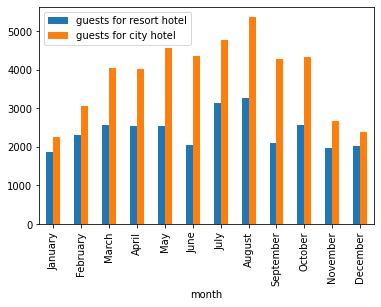

In [46]:
rush_final_data.plot.bar(x = "month",y=["guests for resort hotel","guests for city hotel"])

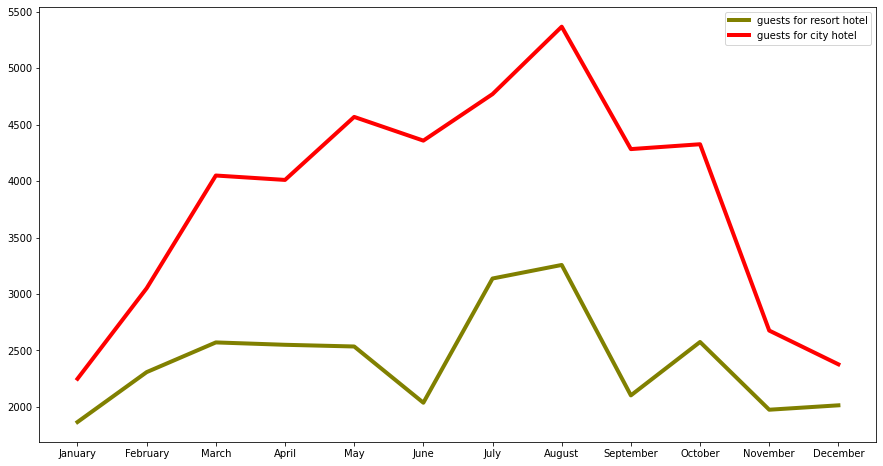

In [47]:
plt.figure(figsize=(15,8))
plt.plot( 'month', 'guests for resort hotel', data=rush_final_data, marker='', color='olive', linewidth=4)
plt.plot( 'month', 'guests for city hotel', data=rush_final_data, marker='', color='red', linewidth=4)
plt.legend()
plt.show()

**selecting importing features**

In [48]:
hotel.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.292876,0.016622,0.008315,-0.005948,-0.001323,0.025542,0.058182,0.004851,-0.032569,-0.083745,0.110139,-0.057365,-0.144832,-0.046770,-0.083594,0.054301,0.046492,-0.195701,-0.234877
lead_time,0.292876,1.000000,0.040334,0.127046,0.002306,0.085985,0.166892,0.117575,-0.037878,-0.021003,-0.123209,0.086025,-0.073599,0.002230,-0.013114,-0.085854,0.170008,-0.065018,-0.116624,-0.095949
arrival_date_year,0.016622,0.040334,1.000000,-0.540373,-0.000121,0.021694,0.031203,0.030266,0.054710,-0.013192,0.010281,-0.119905,0.029234,0.031416,0.056438,0.033682,-0.056348,0.198429,-0.013812,0.108610
arrival_date_week_number,0.008315,0.127046,-0.540373,1.000000,0.066572,0.018629,0.016047,0.026567,0.005556,0.010417,-0.031125,0.035493,-0.021009,0.006311,-0.018225,-0.032912,0.022677,0.076281,0.001980,0.026202
arrival_date_day_of_month,-0.005948,0.002306,-0.000121,0.066572,1.000000,-0.016225,-0.028362,-0.001754,0.014550,-0.000235,-0.006471,-0.027027,-0.000306,0.011266,0.000159,0.003667,0.022532,0.030291,0.008569,0.003026
stays_in_weekend_nights,-0.001323,0.085985,0.021694,0.018629,-0.016225,1.000000,0.494175,0.094759,0.046135,0.018607,-0.086009,-0.012769,-0.042859,0.050191,0.162411,-0.080783,-0.054399,0.050670,-0.018520,0.073124
stays_in_week_nights,0.025542,0.166892,0.031203,0.016047,-0.028362,0.494175,1.000000,0.096214,0.044652,0.020373,-0.095302,-0.013976,-0.048873,0.080018,0.196777,-0.044437,-0.002026,0.066847,-0.024933,0.068738
adults,0.058182,0.117575,0.030266,0.026567,-0.001754,0.094759,0.096214,1.000000,0.029409,0.017890,-0.140973,-0.007070,-0.108856,-0.041472,0.023370,-0.166182,-0.008365,0.224253,0.014438,0.123353
children,0.004851,-0.037878,0.054710,0.005556,0.014550,0.046135,0.044652,0.029409,1.000000,0.023999,-0.032475,-0.024755,-0.021078,0.051000,0.050461,-0.042554,-0.033293,0.325057,0.056247,0.081747
babies,-0.032569,-0.021003,-0.013192,0.010417,-0.000235,0.018607,0.020373,0.017890,0.023999,1.000000,-0.008813,-0.007509,-0.006552,0.085605,0.030235,-0.009426,-0.010627,0.029043,0.037389,0.097939


In [49]:
hotel_corr = hotel.corr()["is_canceled"]

In [50]:
hotel_corr.abs().sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [51]:
hotel.groupby("is_canceled")["reservation_status"].value_counts()

is_canceled  reservation_status
0            Check-Out             75011
1            Canceled              42993
             No-Show                1206
Name: reservation_status, dtype: int64

In [52]:
num_col_hotel = []
drop_cols1 = ['arrival_date_year','days_in_waiting_list',]
for col in hotel.columns:
  if hotel[col].dtype != "object" and col not in drop_cols1:
    num_col_hotel.append(col)
 


In [53]:
drop_cols2 = ['arrival_date_year','days_in_waiting_list','assigned_room_type', 'booking_changes','reservation_status','country']
obj_col_hotel = [col for col in hotel.columns if hotel[col].dtype == "object" and col not in drop_cols2]

In [54]:
obj_col_hotel

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [55]:
data_cat = hotel[obj_col_hotel]
data_num = hotel[num_col_hotel]

In [56]:
data_cat

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,7/1/2015
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,7/1/2015
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,7/2/2015
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,7/2/2015
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,7/3/2015
...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,Offline TA/TO,TA/TO,A,No Deposit,Transient,9/6/2017
119386,City Hotel,August,BB,Online TA,TA/TO,E,No Deposit,Transient,9/7/2017
119387,City Hotel,August,BB,Online TA,TA/TO,D,No Deposit,Transient,9/7/2017
119388,City Hotel,August,BB,Online TA,TA/TO,A,No Deposit,Transient,9/7/2017


In [57]:
data_cat.dtypes

hotel                      object
arrival_date_month         object
meal                       object
market_segment             object
distribution_channel       object
reserved_room_type         object
deposit_type               object
customer_type              object
reservation_status_date    object
dtype: object

In [58]:
data_cat["reservation_status_date"] = pd.to_datetime(data_cat["reservation_status_date"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore") 

In [60]:
data_cat["reservation_status_day"] = data_cat["reservation_status_date"].dt.day
data_cat["reservation_status_month"] = data_cat["reservation_status_date"].dt.month
data_cat["reservation_status_year"] = data_cat["reservation_status_date"].dt.year

In [61]:
data_cat.drop("reservation_status_date",axis=1,inplace=True)

In [62]:
data_cat["cancellation"] = hotel["is_canceled"]

In [63]:
data_cat

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_day,reservation_status_month,reservation_status_year,cancellation
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,1,7,2015,0
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,1,7,2015,0
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2,7,2015,0
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2,7,2015,0
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,3,7,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,Offline TA/TO,TA/TO,A,No Deposit,Transient,6,9,2017,0
119386,City Hotel,August,BB,Online TA,TA/TO,E,No Deposit,Transient,7,9,2017,0
119387,City Hotel,August,BB,Online TA,TA/TO,D,No Deposit,Transient,7,9,2017,0
119388,City Hotel,August,BB,Online TA,TA/TO,A,No Deposit,Transient,7,9,2017,0


**handling categorical values**

In [64]:
cat_cols = data_cat.drop("cancellation",axis=1)

In [65]:
# mean encoding
for  cols in cat_cols:
  data_encoded = data_cat.groupby(cols)["cancellation"].mean().to_dict()
  cat_cols[cols] = cat_cols[cols].map(data_encoded)

In [66]:
cat_cols

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_day,reservation_status_month,reservation_status_year
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,0.438897,0.361283,0.460402
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,0.438897,0.361283,0.460402
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,0.437773,0.361283,0.460402
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,0.437773,0.361283,0.460402
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,0.347103,0.361283,0.460402
...,...,...,...,...,...,...,...,...,...,...,...
119385,0.417859,0.377823,0.374106,0.343313,0.410598,0.391567,0.28402,0.407864,0.486916,0.284847,0.305844
119386,0.417859,0.377823,0.374106,0.367590,0.410598,0.292683,0.28402,0.407864,0.398108,0.284847,0.305844
119387,0.417859,0.377823,0.374106,0.367590,0.410598,0.318108,0.28402,0.407864,0.398108,0.284847,0.305844
119388,0.417859,0.377823,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,0.398108,0.284847,0.305844


In [67]:
final_data = pd.concat([data_num,cat_cols],axis=1)

In [68]:
final_data.head(4)

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,adr,required_car_parking_spaces,total_of_special_requests,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_day,reservation_status_month,reservation_status_year
0,0,342,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0.0,0,0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,0.438897,0.361283,0.460402
1,0,737,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0.0,0,0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,0.438897,0.361283,0.460402
2,0,7,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,75.0,0,0,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,0.437773,0.361283,0.460402
3,0,13,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,75.0,0,0,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,0.437773,0.361283,0.460402


In [69]:
final_data.columns

Index(['is_canceled', 'lead_time', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests',
       'hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'reservation_status_day', 'reservation_status_month',
       'reservation_status_year'],
      dtype='object')

**Handling outliers**

In [70]:
def handle_outlier(col):
  final_data[col] = np.log1p(final_data[col])

In [71]:
handle_outlier("lead_time")

**feature importance**

In [72]:
final_data.dropna(inplace=True)

In [73]:
y = final_data["is_canceled"]
x = final_data.drop("is_canceled",axis=1)

In [74]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [75]:
feature_selection = SelectFromModel(Lasso(alpha = 0.005,random_state = 0))

In [76]:
feature_selection.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [77]:
feature_selection.get_support()

array([ True,  True,  True, False,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False,  True, False, False,  True,
       False])

In [78]:
columns = x.columns
selected_columns = columns[feature_selection.get_support()]

In [79]:
columns.shape,selected_columns.shape

((28,), (15,))

In [80]:
x = final_data[selected_columns]

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=40)

In [83]:
print(X_train.shape,X_test.shape)

(89407, 15) (29803, 15)


In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [86]:
y_pred = lr.predict(X_test)

In [87]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [88]:
c_matrix = confusion_matrix(y_test,y_pred)
a_score = accuracy_score(y_test,y_pred)
print(a_score)
print("\n")
print(c_matrix)

0.7648558869912425


[[16905  1924]
 [ 5084  5890]]


In [89]:
from sklearn.model_selection import cross_val_score

In [90]:
score = cross_val_score(lr,x,y,cv=15)
score.mean()

0.7331184968137447

**Applying Multiple Algorithms and verifying its Accuracy**

In [91]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [102]:
models = []

models.extend( [("logistic regression",LogisticRegression()),
               ("naive_bayes",GaussianNB()),
               ("kNN",KNeighborsClassifier()),
               ("randomforest",RandomForestClassifier()),
               ("decision_tree",DecisionTreeClassifier())])

In [103]:
models

[('logistic regression', LogisticRegression()),
 ('naive_bayes', GaussianNB()),
 ('kNN', KNeighborsClassifier()),
 ('randomforest', RandomForestClassifier()),
 ('decision_tree', DecisionTreeClassifier())]

In [106]:
for name,model in models:
  print(name)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print(confusion_matrix(y_pred,y_test))
  print("\n")
  print(accuracy_score(y_pred,y_test))
  print("--------------------********------------------------")
  

logistic regression
[[16905  5084]
 [ 1924  5890]]


0.7648558869912425
--------------------********------------------------
naive_bayes
[[ 8396  1170]
 [10433  9804]]


0.6106767775056202
--------------------********------------------------
kNN
[[16099  3722]
 [ 2730  7252]]


0.7835117270073483
--------------------********------------------------
randomforest
[[18455  1625]
 [  374  9349]]


0.9329262154816629
--------------------********------------------------
decision_tree
[[17513  1251]
 [ 1316  9723]]


0.9138677314364326
--------------------********------------------------
